# Tabla Y4-125

In [ ]:
#!pip install specdal spectrum

Extraer datos

In [1]:
import os
from specdal import Collection, Spectrum, read
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

datadir = "./Espectros_FORS_2/Y4"
archivos = list()
specs = list()
specs_df = list()
etiquetas = ['A1','A2','A3','A4','A5',
             'B1','B2','B3','B4','B5',
             'C1','C2','C3','C4','C5',
             'D1','D2','D3','D4','D5',
             'E1','E2','E3','E4','E5',
            ]
features = []

for f in os.listdir(datadir):
    title =str(f)[8:-8]
    archivos.append(f)
archivos.sort()

In [2]:
for f in archivos:
    data = pd.read_csv(datadir+"/"+f,delimiter='\t')
    title =str(f)[:-4]
    dev_x = data['Wavelength']
    dev_y = data[title]
    df = pd.DataFrame({'x': dev_x, 'y': dev_y})
    specs_df.append(df)
    tmp_arr = df.to_numpy()
    specs.append(tmp_arr)

    tmp = np.array(dev_y)
    features.append(tmp)
print(len(specs))
print(len(specs_df))
len(features)

125
125


125

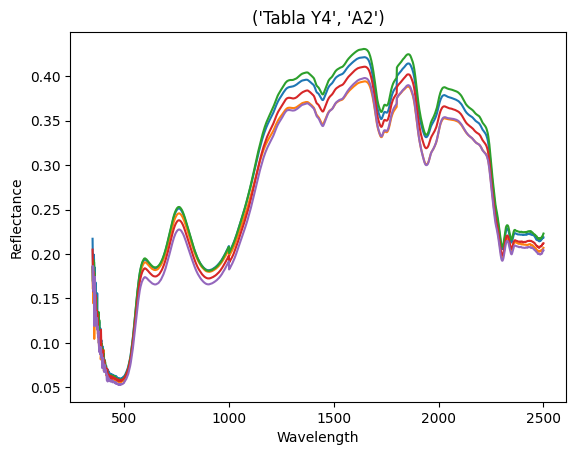

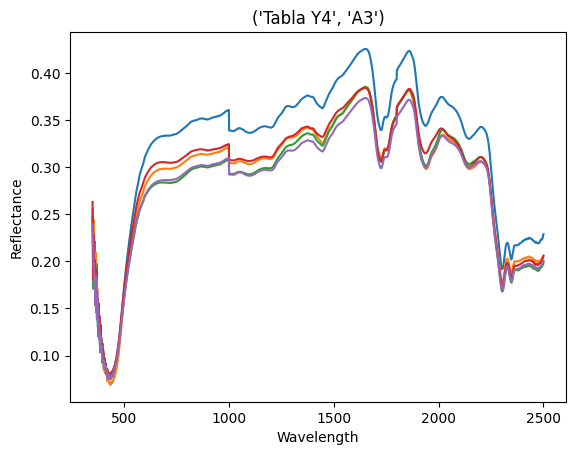

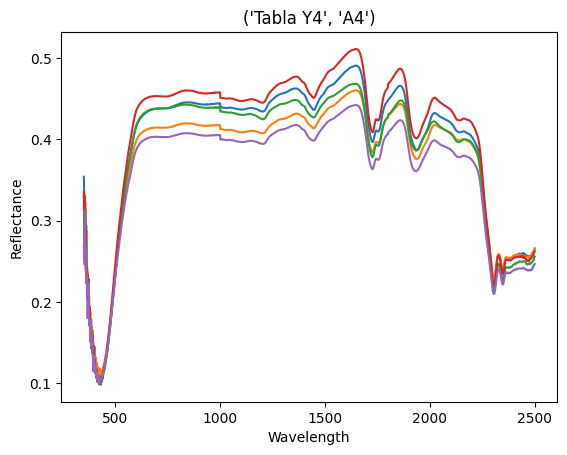

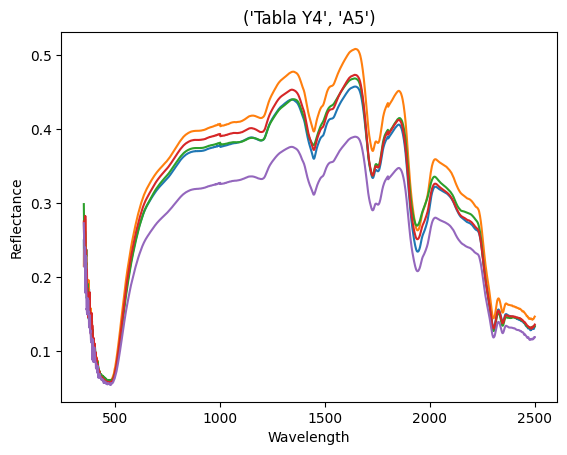

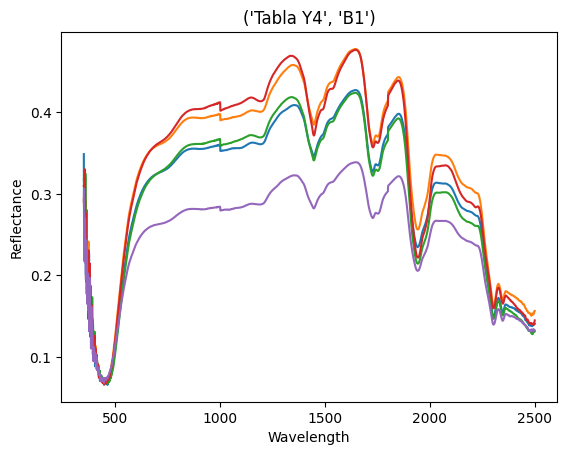

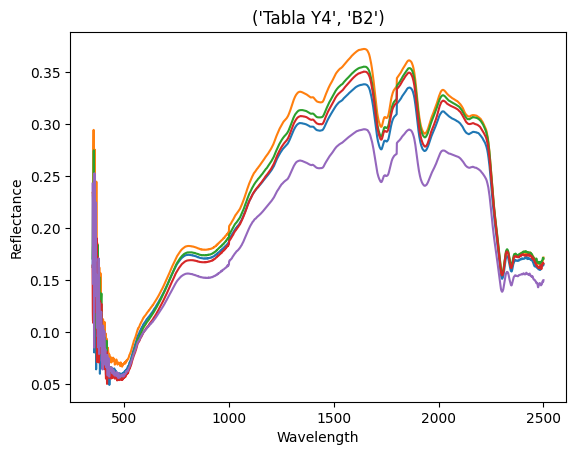

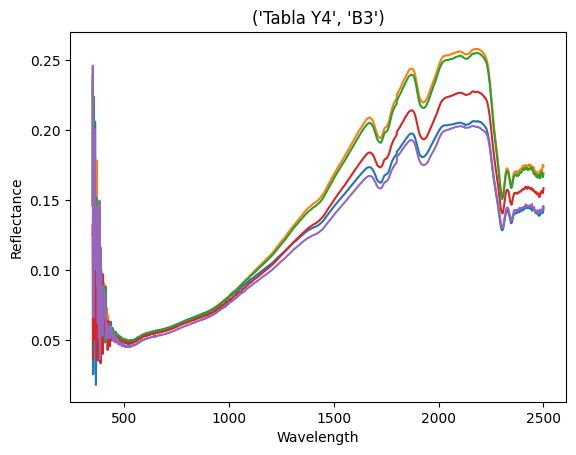

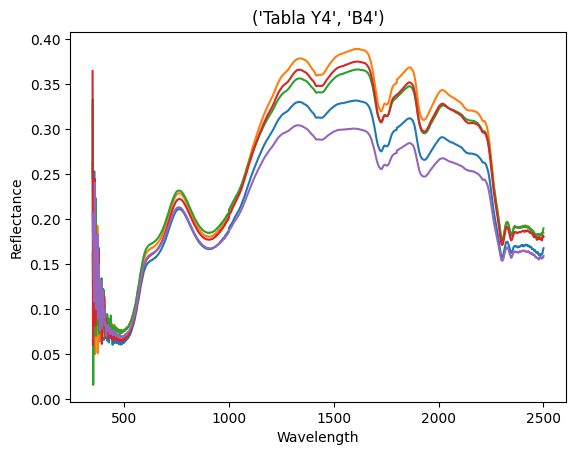

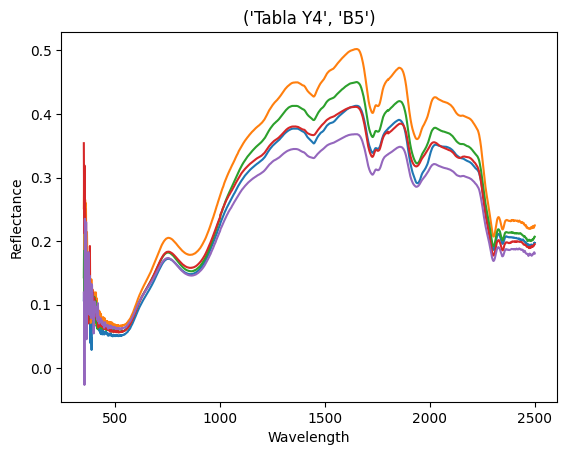

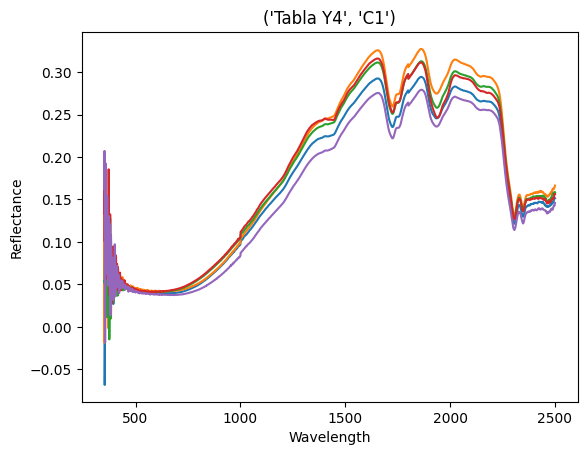

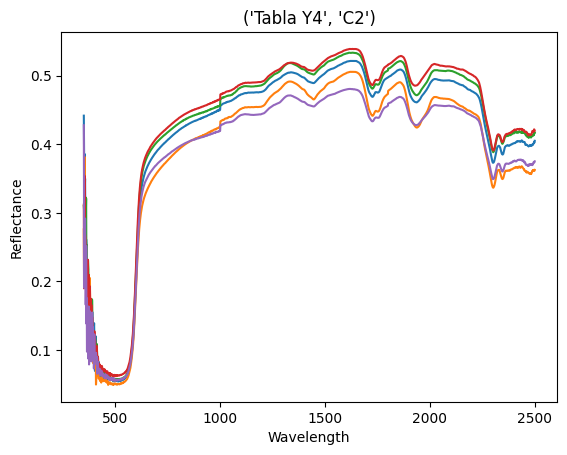

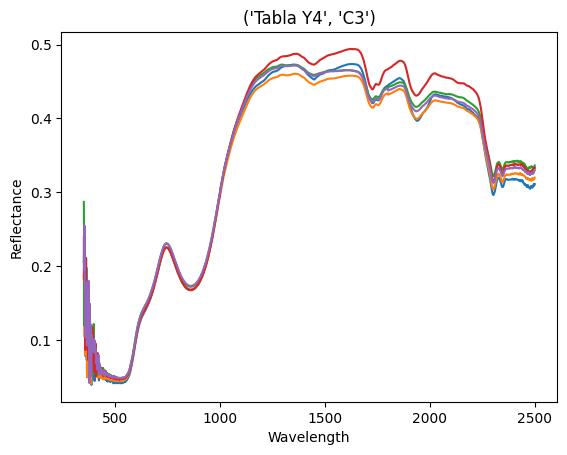

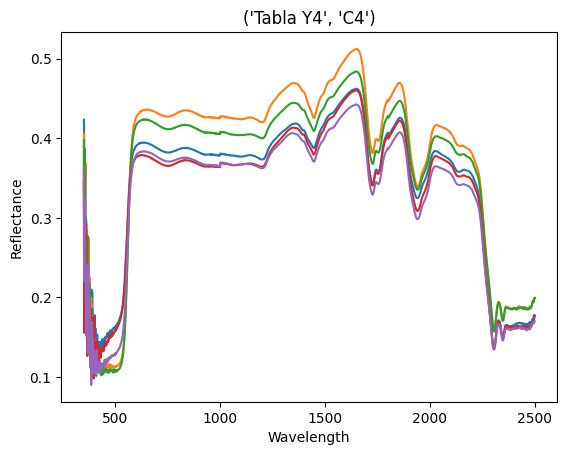

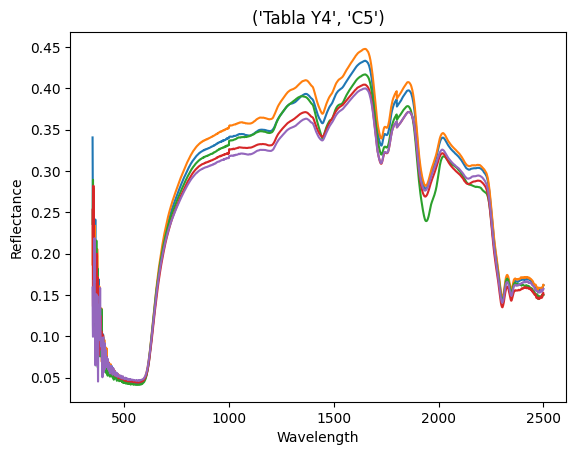

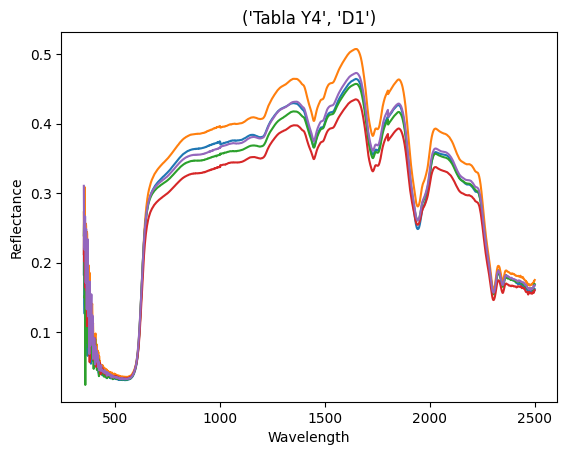

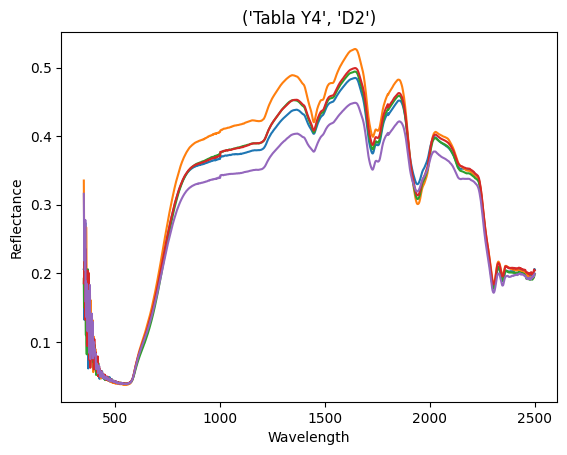

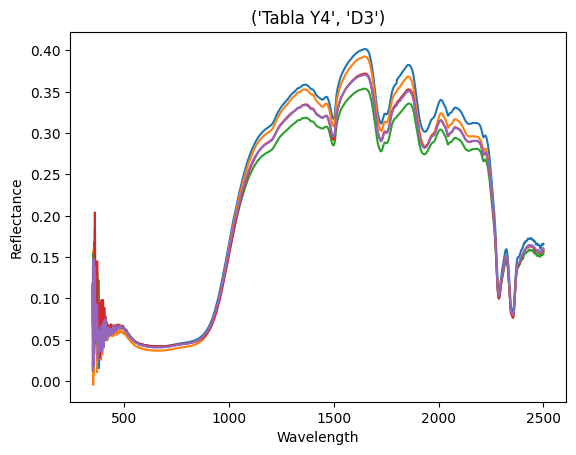

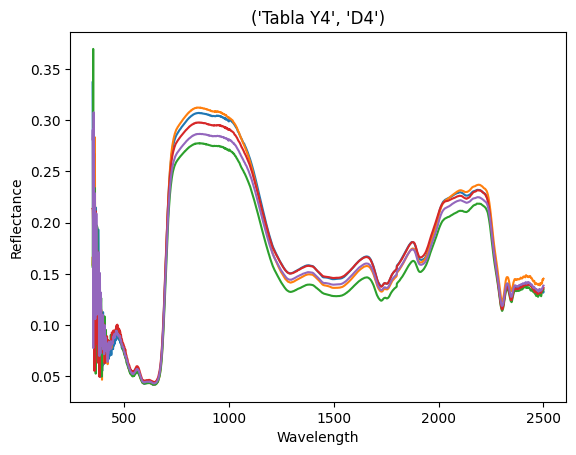

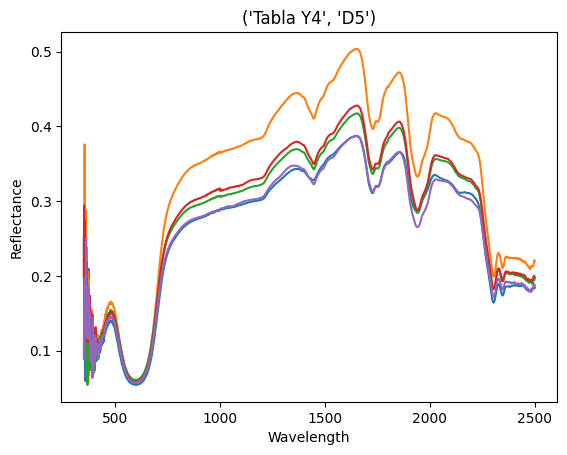

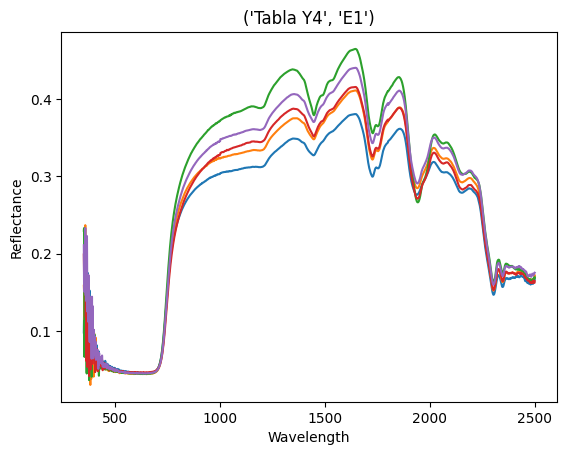

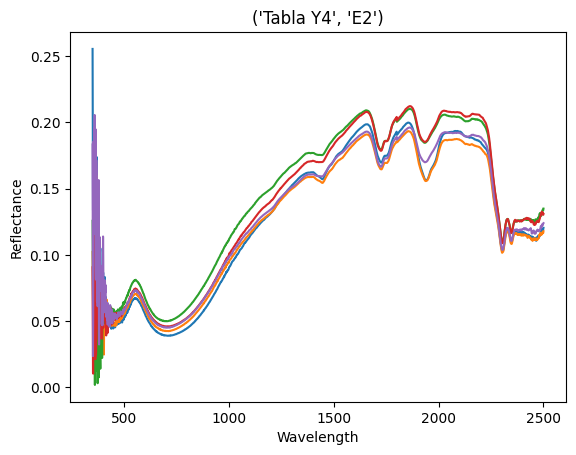

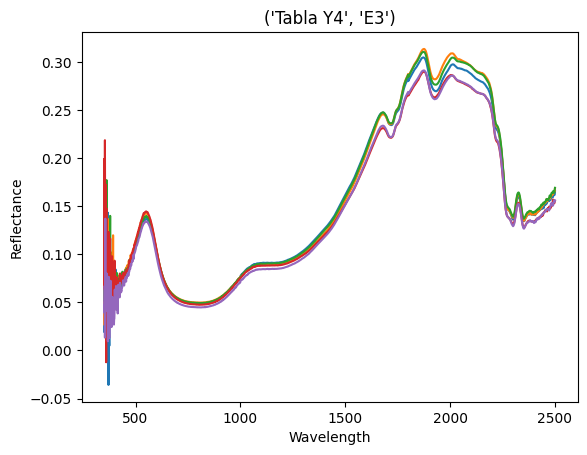

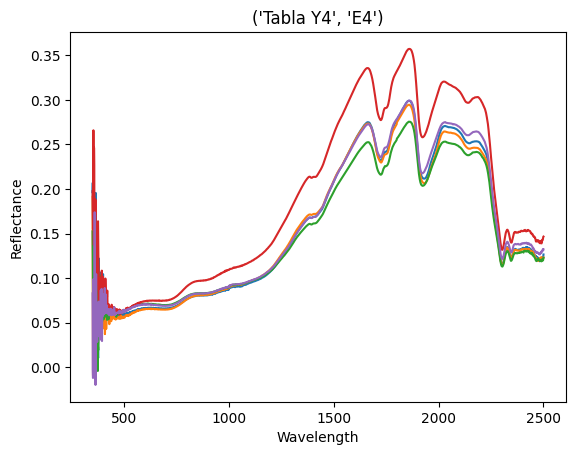

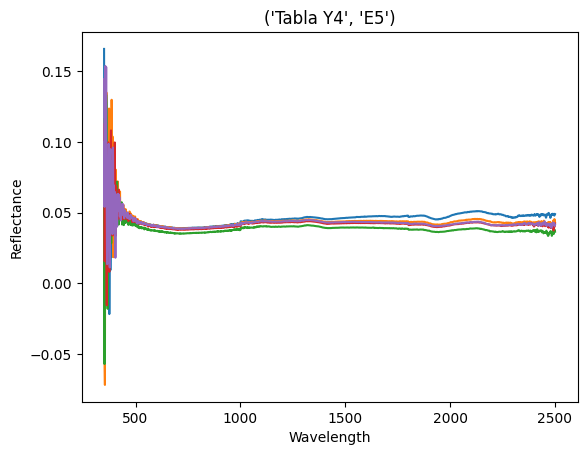

IndexError: list index out of range

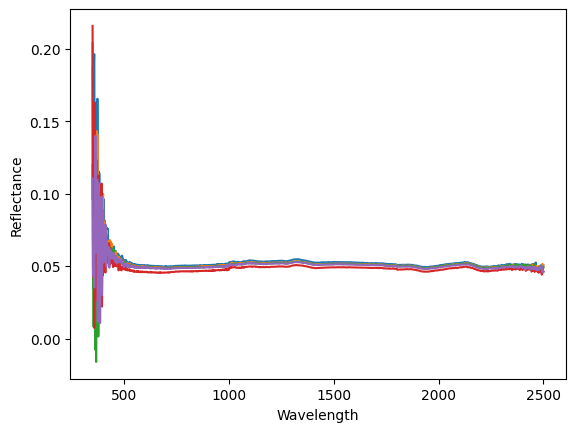

In [6]:
cont = 0
aux = 0

for f in specs_df:
    dev_x = f['x'].to_numpy()
    dev_y = f['y'].to_numpy()
    plt.plot(dev_x, dev_y)
    aux+=1
    if aux == 5:
        cont+=1
        aux=0
        plt.xlabel('Wavelength')
        plt.ylabel('Reflectance')
        t = "Tabla Y4",etiquetas[cont]
        plt.title(t)
        plt.show()

In [ ]:
def imprime_todos():
    for f in specs_df:
        dev_x = f['x'].to_numpy()
        dev_y = f['y'].to_numpy()
        print(dev_y)
        plt.ylabel('Reflectance')
        plt.xlabel('Wavelength')
        t = "Tabla Y4"#,etiquetas[cont]
        plt.plot(dev_x, dev_y)
        plt.title(t)
        plt.show()
      
        cont+=1

# Bayes ingenuo

In [ ]:
# Función auxiliar  Cuenta las diferencias entre dos listas y 
# muestra el índice donde son diferentes.
def show_differences(list1, list2):
  differences = {}
  for i in range(len(list1)):
    if list1[i] != list2[i]:
      differences[i] = [list1[i], list2[i]]

  return differences

In [ ]:
#feature_names = data['feature_names']
feature_names = ['wavelength','reflectance']
labels = np.arange(125)

train, test, train_labels, test_labels = train_test_split(
   features,labels,test_size = 0.00001, random_state = 22
)
print(len(features))
#print(train)
#print(test)
#print(train_labels)


GNBclf = GaussianNB()

model = GNBclf.fit(train, train_labels)
print(len(model.classes_))
test=features
preds = GNBclf.predict(test)
print(preds)
print(show_differences(preds, labels))

# Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train, train_labels)
reg.score(train, train_labels)
pb = reg.predict(test)
len(pb)
for i in range(len(pb)):
    print("Predicción en",i," es ",round(pb[i],2))

print(show_differences(preds, labels))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = LogisticRegression(penalty='l2',solver='lbfgs', max_iter=4000)
#make_pipeline(StandardScaler(), LogisticRegression())
clf.fit(train, train_labels)
clf.score(train, train_labels)
clf.predict_proba(test)
clf.predict(test)

print(show_differences(preds, labels))

# Perceptron

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(train, train_labels)
Perceptron()
clf.score(train, train_labels)
clf.predict(train)

print(show_differences(preds, labels))